## Visualising air quality data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import requests
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import IntRangeSlider, SelectMultiple
from IPython.display import display
import ssl

%matplotlib inline

In [2]:
data = pd.read_csv("Cleaned_data/LDN_AQ_2020_2019.csv")
data

,Unnamed: 0,Date,Nitrogen Dioxide 2020,Nitrogen Dioxide 2019,CountryName,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay
0,0,Jan 1,44.989583,27.846809,United Kingdom,0.0,0.0,0.00,0.00
1,1,Jan 2,20.117021,41.287234,United Kingdom,0.0,0.0,0.00,0.00
2,2,Jan 3,17.861224,50.687500,United Kingdom,0.0,0.0,0.00,0.00
3,3,Jan 4,34.404167,42.110638,United Kingdom,0.0,0.0,0.00,0.00
4,4,Jan 5,16.930612,49.836957,United Kingdom,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
189,189,Aug 5,32.460784,25.262000,United Kingdom,306293.0,41226.0,65.28,65.28
190,190,Aug 6,17.457447,35.690000,United Kingdom,307184.0,41240.0,65.28,65.28
191,191,Aug 7,18.083673,43.081633,United Kingdom,308134.0,41258.0,65.28,65.28
192,192,Aug 8,40.606667,31.102083,United Kingdom,309005.0,41270.0,65.28,65.28


/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

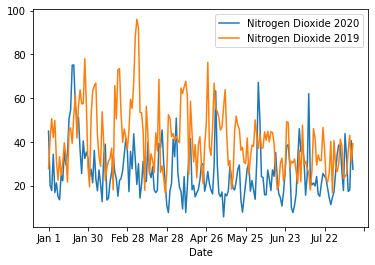

In [3]:
data.plot(y=['Nitrogen Dioxide 2020', 'Nitrogen Dioxide 2019'], x='Date')

In [ ]:
# Plot nitrogen dioxide over time, with key dates overlaid
sns.set_style("white")

plot = sns.relplot(
        data=data, 
        y='Nitrogen Dioxide 2020', 
        x='Date', 
        height=7, 
        aspect=3, 
        kind='line'
)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xticks(np.arange(0, 210, step=7))

plt.axvline(x=61, ls='--', color='k', linewidth=3) ##WFH Guidance 16th March
plt.axvline(x=68, ls='--', color='g', linewidth=3)## Lockdown 23 March
plt.axvline(x=110, ls='--', color='y', linewidth=3) ## Early May Bank holiday (8th)
plt.axvline(x=130, ls='--', color='r', linewidth=3) ## groups of 6 in parks (June 1st)
plt.axvline(x=158, ls='--', color='m', linewidth=3) ## pubs and restaurants (july 4th)

sns.set(font_scale = 2)

plot.savefig("Cleaned_data/Figures/Air_quality_key_dates.png", dpi=300)

## Read in stringency, air quality and traffic data

In [ ]:
file2 = ("Cleaned_data/traffic_stringency_airquality.csv")
date = ['Date']
london_air_traffic_stringency = (
    pd
    .read_csv(file2,
              parse_dates=date)
)

print(london_air_traffic_stringency.head())

In [ ]:
sns.set_theme(style="darkgrid")
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
london_air_traffic_stringency.info()

In [ ]:
sns.relplot(
    data=london_air_traffic_stringency[london_air_traffic_stringency['Transport mode'] == 'Cars'], 
    x='Date', 
    y='Count', 
    kind='line',
    height=7,
    aspect=3
)

In [ ]:
sns.relplot(
    data=london_air_traffic_stringency[london_air_traffic_stringency['Transport mode'] == 'Vans'], 
    x='Date', 
    y='Count', 
    kind='line',
    height=7,
    aspect=3
)

In [ ]:
sns.relplot(
    data=london_air_traffic_stringency[london_air_traffic_stringency['Transport mode'] == 'Motorbikes'], 
    x='Date', 
    y='Count', 
    kind='line',
    height=7,
    aspect=3
)

In [ ]:
sns.relplot(
    data=london_air_traffic_stringency[london_air_traffic_stringency['Transport mode'] == 'Buses'], 
    x='Date', 
    y='Count', 
    kind='line',
    height=7,
    aspect=3
)

In [ ]:
sns.relplot(
    data=london_air_traffic_stringency[london_air_traffic_stringency['Transport mode'] == 'Trucks'], 
    x='Date', 
    y='Count', 
    kind='line',
    height=7,
    aspect=3
)

In [ ]:
sns.relplot(
    data=london_air_traffic_stringency, 
    y="Count", 
    x="Date", 
    hue='Transport mode', 
    kind='line')

In [ ]:
## interesting here that while there was an increase in car usage as lockdown eased, other forms of transport did not increase in the same way.